In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from plot_functions import *
from sklearn.model_selection import KFold

In [2]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os


def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [3]:
n_splits = 10
import sys
case=2
a=2
cost='abs'

In [4]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [5]:
au_df, au_dfc = create_matrix_single_region("Austin", year)
au_tensor = get_tensor(au_df, au_dfc)

In [6]:
df, dfc = create_matrix_single_region("SanDiego", year)
tensor = get_tensor(df, dfc)

In [7]:
from sklearn.model_selection import train_test_split, KFold

In [8]:
n_splits = 10


In [9]:
from common import compute_rmse

In [10]:
np.arange(0.1, 1.0, 0.1)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [12]:
pred = {}
sd = {}
out = {}
n_splits = 10
NUM_RANDOM = 4
TRAIN_SPLITS = range(10, 110, 40)
case = 2

cost = 'abs'
algo ='gd_decay'
for train_iterations in [50, 100, 500, 1000, 2000, 4000, 6000]:
    np.random.seed(0)
    pred[train_iterations] = {}
    for a in range(2, 3):
        H_au, A_au, T_au = learn_HAT(case, au_tensor, a, a, num_iter=train_iterations, lr=1, dis=False, cost_function=cost, decay_mul=0.995)
        pred[train_iterations][a] = {}
        for random_seed in range(NUM_RANDOM):
            pred[train_iterations][a][random_seed] = {}
            for appliance in APPLIANCES_ORDER:
                pred[train_iterations][a][random_seed][appliance] = {f:[] for f in TRAIN_SPLITS}

        kf = KFold(n_splits=n_splits)
        for random_seed in range(NUM_RANDOM):

            for train_percentage in TRAIN_SPLITS:
                print(train_iterations, a, random_seed,train_percentage)
                for train_max, test in kf.split(df):

                    num_train = int((train_percentage*len(train_max)/100)+0.5)
                    if train_percentage==100:
                        train = train_max
                    else:
                        train, _ = train_test_split(train_max, train_size = train_percentage/100.0, random_state=random_seed)
                    train_ix = df.index[train]
                    test_ix = df.index[test]

                    num_test = len(test_ix)
                    train_test_ix = np.concatenate([test_ix, train_ix])
                    df_t, dfc_t = df.ix[train_test_ix], dfc.ix[train_test_ix]
                    tensor = get_tensor(df_t, dfc_t)
                    tensor_copy = tensor.copy()
                    # First n
                    tensor_copy[:num_test, 1:, :] = np.NaN
                    H, A, T = learn_HAT(case, tensor_copy, a, a, num_iter=2000, lr=1, dis=False, cost_function=cost, A_known=A_au, decay_mul=0.995)

                    assert(np.allclose(A, A_au))
                    HAT = multiply_case(H, A, T, case)
                    for appliance in APPLIANCES_ORDER:
                        pred[train_iterations][a][random_seed][appliance][train_percentage].append(pd.DataFrame(HAT[:num_test, appliance_index[appliance], :], index=test_ix))


(50, 2, 0, 10)
(50, 2, 0, 50)
(50, 2, 0, 90)
(50, 2, 1, 10)
(50, 2, 1, 50)
(50, 2, 1, 90)
(50, 2, 2, 10)
(50, 2, 2, 50)
(50, 2, 2, 90)
(50, 2, 3, 10)
(50, 2, 3, 50)
(50, 2, 3, 90)
(100, 2, 0, 10)
(100, 2, 0, 50)
(100, 2, 0, 90)
(100, 2, 1, 10)
(100, 2, 1, 50)
(100, 2, 1, 90)
(100, 2, 2, 10)
(100, 2, 2, 50)
(100, 2, 2, 90)
(100, 2, 3, 10)
(100, 2, 3, 50)
(100, 2, 3, 90)
(500, 2, 0, 10)
(500, 2, 0, 50)
(500, 2, 0, 90)
(500, 2, 1, 10)
(500, 2, 1, 50)
(500, 2, 1, 90)
(500, 2, 2, 10)
(500, 2, 2, 50)
(500, 2, 2, 90)
(500, 2, 3, 10)
(500, 2, 3, 50)
(500, 2, 3, 90)
(1000, 2, 0, 10)
(1000, 2, 0, 50)
(1000, 2, 0, 90)
(1000, 2, 1, 10)
(1000, 2, 1, 50)
(1000, 2, 1, 90)
(1000, 2, 2, 10)
(1000, 2, 2, 50)
(1000, 2, 2, 90)
(1000, 2, 3, 10)
(1000, 2, 3, 50)
(1000, 2, 3, 90)
(2000, 2, 0, 10)
(2000, 2, 0, 50)
(2000, 2, 0, 90)
(2000, 2, 1, 10)
(2000, 2, 1, 50)
(2000, 2, 1, 90)
(2000, 2, 2, 10)
(2000, 2, 2, 50)
(2000, 2, 2, 90)
(2000, 2, 3, 10)
(2000, 2, 3, 50)
(2000, 2, 3, 90)
(4000, 2, 0, 10)
(4000, 2, 0

In [ ]:
pred[3][0]['hvac'].keys()

In [13]:
from common import compute_rmse_fraction

In [37]:
out = {}
for train_iterations in [50, 100, 500, 1000, 2000, 4000, 6000]:

    out[train_iterations] = {}
    for a in range(2, 3):
        out[train_iterations][a] = {}
        for random_seed in range(NUM_RANDOM):
            out[train_iterations][a][random_seed] = {}

            for appliance in APPLIANCES_ORDER[1:]:
                out[train_iterations][a][random_seed][appliance] = {}
                for f in TRAIN_SPLITS:
                    s = pd.concat(pred[train_iterations][a][random_seed][appliance][f]).ix[df.index]
                    if appliance=="hvac":
                        out[train_iterations][a][random_seed][appliance][f] = compute_rmse(appliance,s[range(4, 10)],'SanDiego')[2]
                    else:   
                        out[train_iterations][a][random_seed][appliance][f] = compute_rmse(appliance, s,'SanDiego')[2]

    

/Users/nipunbatra/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  del sys.path[0]


ValueError: Length mismatch: Expected axis has 12 elements, new values have 6 elements

In [34]:
out = {}
for train_iterations in [50, 100, 500, 1000, 2000, 4000, 6000]:

    out[train_iterations] = {}
    for a in range(2, 3):
        out[train_iterations][a] = {}
        for random_seed in range(NUM_RANDOM):
            out[train_iterations][a][random_seed] = {}

            for appliance in APPLIANCES_ORDER[1:]:
                out[train_iterations][a][random_seed][appliance] = {}
                for f in TRAIN_SPLITS:
                    s = pd.concat(pred[train_iterations][a][random_seed][appliance][f]).ix[df.index]
                    if appliance=="hvac":
                        out[train_iterations][a][random_seed][appliance][f] = compute_rmse(appliance,s[range(4, 10)],'SanDiego')[2]
                    else:   
                        out[train_iterations][a][random_seed][appliance][f] = compute_rmse(appliance, s,'SanDiego')[2]

    

/Users/nipunbatra/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  del sys.path[0]


In [35]:
o = {}
for train_iterations in [50, 100, 500, 1000, 2000, 4000, 6000]:
    o[train_iterations] =  pd.Panel(out[train_iterations][a]).mean(axis=0)

In [28]:
o[500]

,dw,fridge,hvac,mw,oven,wm
10,2.208443,13.551770,27.093705,2.613128,3.026380,1.124331
50,1.858565,10.977321,16.560261,2.289505,2.194957,0.936502
90,1.847158,10.802332,16.635976,2.285560,2.156874,0.928893


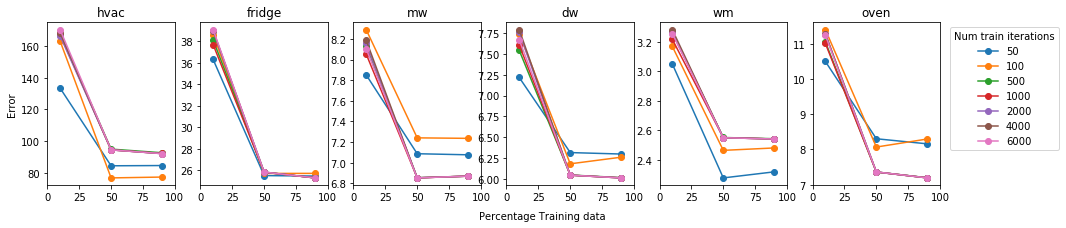

In [36]:
fig, ax = plt.subplots(ncols=6, figsize=(16, 3))
for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
    for train_iterations in [50, 100, 500, 1000, 2000, 4000, 6000]:

        num_iter_df = o[train_iterations]
        num_iter_df[appliance].plot(ax=ax[i], marker='o',  title=appliance, label=train_iterations)
        ax[i].set_xlim(0, 100)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", title='Num train iterations')
ax[0].set_ylabel("Error")
fig.text(0.5, -0.03, "Percentage Training data")

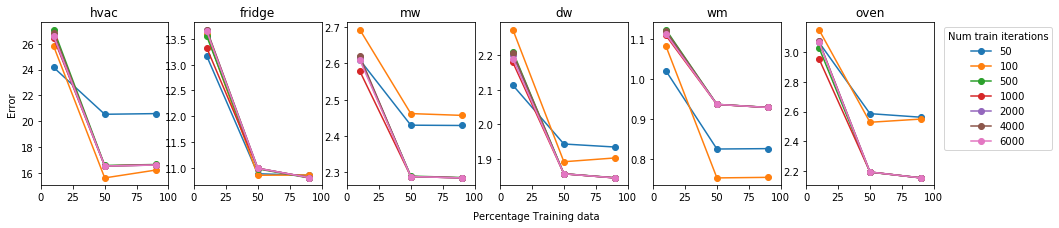

In [32]:
fig, ax = plt.subplots(ncols=6, figsize=(16, 3))
for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
    for train_iterations in [50, 100, 500, 1000, 2000, 4000, 6000]:

        num_iter_df = o[train_iterations]
        num_iter_df[appliance].plot(ax=ax[i], marker='o',  title=appliance, label=train_iterations)
        ax[i].set_xlim(0, 100)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", title='Num train iterations')
ax[0].set_ylabel("Error")
fig.text(0.5, -0.03, "Percentage Training data")

In [33]:
num_iter_df

,dw,fridge,hvac,mw,oven,wm
10,2.188046,13.647164,26.599218,2.609085,3.063783,1.113184
50,1.858427,10.989561,16.520521,2.288253,2.195866,0.936449
90,1.846614,10.809638,16.592599,2.284509,2.156432,0.928602


In [44]:
ada_df

,dw,fridge,hvac,mw,oven,wm
10,1.891382,10.918816,19.794011,2.303500,2.333014,0.916405
50,1.838812,10.529209,16.814317,2.251883,2.103494,0.895534
90,1.824375,10.228919,16.762082,2.244887,2.051483,0.881904


In [45]:
gd_decay_df

,dw,fridge,hvac,mw,oven,wm
10,2.188111,13.647995,26.653796,2.609201,3.064491,1.113142
50,1.858395,10.990242,16.522817,2.288249,2.195777,0.936494
90,1.846612,10.809567,16.592600,2.284508,2.156415,0.928596


In [47]:
gd_df

,dw,fridge,hvac,mw,oven,wm
10,1.949841,11.484136,21.051706,2.371455,2.414622,0.995974
50,1.843906,10.610251,17.073151,2.271219,2.107215,0.920190
90,1.826669,10.050983,16.672155,2.260551,2.039697,0.894835


In [48]:
import pickle
pickle.dump(ada_gd, open("predictions/transfer_ada_gd.pkl", 'w'))

In [23]:
means = {}
stds = {}
for a in range(2, 5):
    means[a] = pd.Panel(out[a]).mean(axis=0)
    stds[a] = pd.Panel(out[a]).std(axis=0)

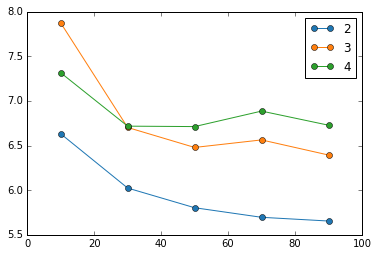

In [38]:
mean_mean = pd.DataFrame({a:means[a].mean(axis=1) for a in range(2, 5)})
mean_mean.plot(color=tableau20blind[::2], marker='o', xlim=(0, 100))

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:983: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


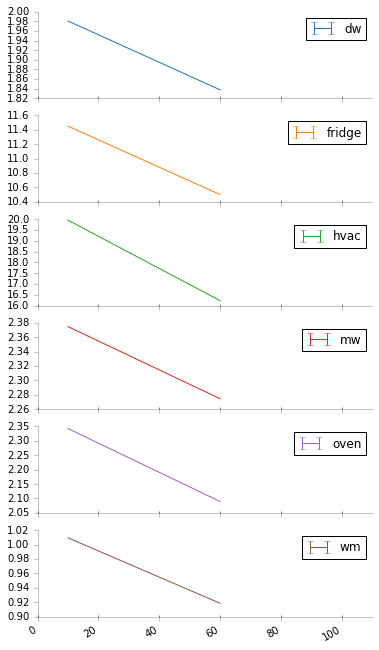

In [20]:
ax = means_df.plot(subplots=True, yerr=std_df, figsize=(6, 12), xlim=(0, 110), colors=tableau20blind[::2])
for a in ax:
    format_axes(a)

In [39]:
st = pd.HDFStore('transfer.h5', mode='a')
st['/transfer_mean'] = mean_mean
#st['/transfer_sd'] = std_df
print st.keys()
st.close()

['/normal_mean', '/normal_sd', '/transfer_mean', '/transfer_sd']


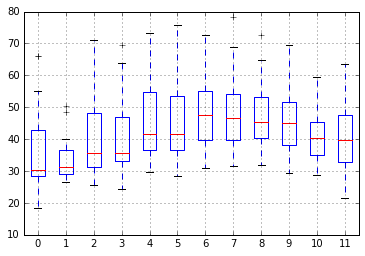

In [85]:
#prediction_appliance.boxplot()
gt_appliance = df[['%s_%d' %(appliance, month) for month in range(1, 13)]]
gt_appliance.columns = prediction_appliance.columns
gt_appliance.boxplot()

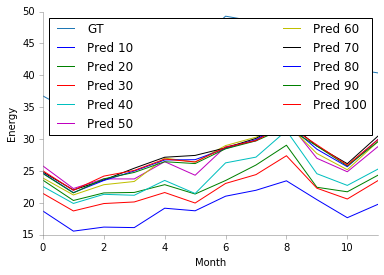

In [113]:
gt_appliance.mean().plot(label='GT', color=tableau20blind[::2][0])
for f in range(10, 110, 10):
  
    random_seed=2
    appliance='fridge'
    prediction_appliance = pd.concat(pred[random_seed][appliance][f]).ix[df.index]
    prediction_appliance.mean().plot(label='Pred '+str(f))
plt.legend(loc=0, mode="expand", ncol=2)
format_axes(plt.gca())
plt.xlabel("Month")
plt.ylabel("Energy")

In [114]:
import pickle
pickle.dump(pred, open("predictions/transfer_pred.pkl", 'w'))

In [117]:
!ls -lah predictions/transfer_pred.pkl

-rw-r--r--  1 nipunbatra  staff    10M Jun 26 16:59 predictions/transfer_pred.pkl
